# Classificação

# Instalando dependências

In [1]:
%%capture

!pip install sidetable
!pip install missingno

# Importando modulos necessários

In [125]:
# data analysis
import pandas as pd
import numpy as np
import sidetable as stb
import missingno as msno

# data viz
import seaborn as sns
import matplotlib.pyplot as plt

# pre-processemento
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# metricas e matrix de confusão
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score
from yellowbrick.classifier import ConfusionMatrix

# modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold

# Funçōes necessárias para o projeto

In [3]:
def date_engineering(df: pd.DataFrame)->pd.DataFrame:
    df["data_inversa"] = pd.to_datetime(df["data_inversa"], format = 'mixed')
    df["year"] = pd.to_datetime(df["data_inversa"]).dt.year
    df["month"] = pd.to_datetime(df["data_inversa"]).dt.month
    df["quarter"] = pd.to_datetime(df["data_inversa"]).dt.quarter
    df["quarter_end"] = pd.to_datetime(df["data_inversa"]).dt.is_quarter_end
    return df

def time_col(col:pd.Series):
  df["hour"] = df["horario"].str.split(":").str[0]
  return df["hour"]

def convert_lower_case(column):
  '''
  Funcao que retorna a coluna selecionada para letra minuscula
  -param column: coluna da pd.Dataframe
  '''
  return column.lower()


# Importando dataset

Escolha do dataset - Acidentes de Trânsito nas Rodovias Federais do Brasil (de 2007 a 2022). Disponível no link: https://www.kaggle.com/datasets/rafaelborgesgraunke/traffic-accidents-brazil-pt-br/data.

In [4]:
df = pd.read_csv('datatran2007-2022.csv')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12892\4135170676.py:1: DtypeWarning: Columns (5,25,26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('datatran2007-2022.csv')


In [5]:
df.head()

,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,10/11/2009,Terça,14:10:00,MG,381.0,495.0,BETIM,Velocidade incompatível,Colisão traseira,Com Vítimas Feridas,...,0,1,0,4,2,NaN,NaN,NaN,NaN,NaN
1,16/10/2009,Sexta,04:35:00,MG,251.0,419.6,GRAO MOGOL,Outras,Colisão frontal,Com Vítimas Fatais,...,5,0,0,5,2,NaN,NaN,NaN,NaN,NaN
2,20/09/2009,Domingo,20:00:00,PI,316.0,24.0,TERESINA,Dormindo,Saída de Pista,Com Vítimas Feridas,...,4,0,0,6,1,NaN,NaN,NaN,NaN,NaN
3,17/05/2009,Domingo,15:45:00,RJ,101.0,429.0,MANGARATIBA,Falta de atenção,Colisão Transversal,Sem Vítimas,...,0,2,0,0,2,NaN,NaN,NaN,NaN,NaN
4,05/07/2009,Domingo,17:30:00,PE,101.0,59.2,RECIFE,Outras,Queda de motocicleta / bicicleta / veículo,Com Vítimas Feridas,...,0,0,0,1,1,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(1981317, 30)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981317 entries, 0 to 1981316
Data columns (total 30 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   data_inversa            object 
 1   dia_semana              object 
 2   horario                 object 
 3   uf                      object 
 4   br                      float64
 5   km                      object 
 6   municipio               object 
 7   causa_acidente          object 
 8   tipo_acidente           object 
 9   classificacao_acidente  object 
 10  fase_dia                object 
 11  sentido_via             object 
 12  condicao_metereologica  object 
 13  tipo_pista              object 
 14  tracado_via             object 
 15  uso_solo                object 
 16  ano                     float64
 17  pessoas                 int64  
 18  mortos                  int64  
 19  feridos_leves           int64  
 20  feridos_graves          int64  
 21  ilesos                  int64  

# Tratamento de dados nulos

In [8]:
# transformando e criando colunas adicionais para data
df = date_engineering(df)
df["hora"] = time_col(df["horario"])

In [9]:
#ordenando datas
df = df.sort_values(by = "data_inversa").reset_index(drop = True)

In [10]:
#percentual de dados vazios
df.stb.missing()

,missing,total,percent
delegacia,1563088,1981317,78.891364
uop,1563008,1981317,78.887326
regional,1562206,1981317,78.846848
latitude,1562200,1981317,78.846545
longitude,1562200,1981317,78.846545
ano,515480,1981317,26.017038
br,894,1981317,0.045122
km,894,1981317,0.045122
fase_dia,70,1981317,0.003533
condicao_metereologica,61,1981317,0.003079


<Figure size 1000x600 with 0 Axes>

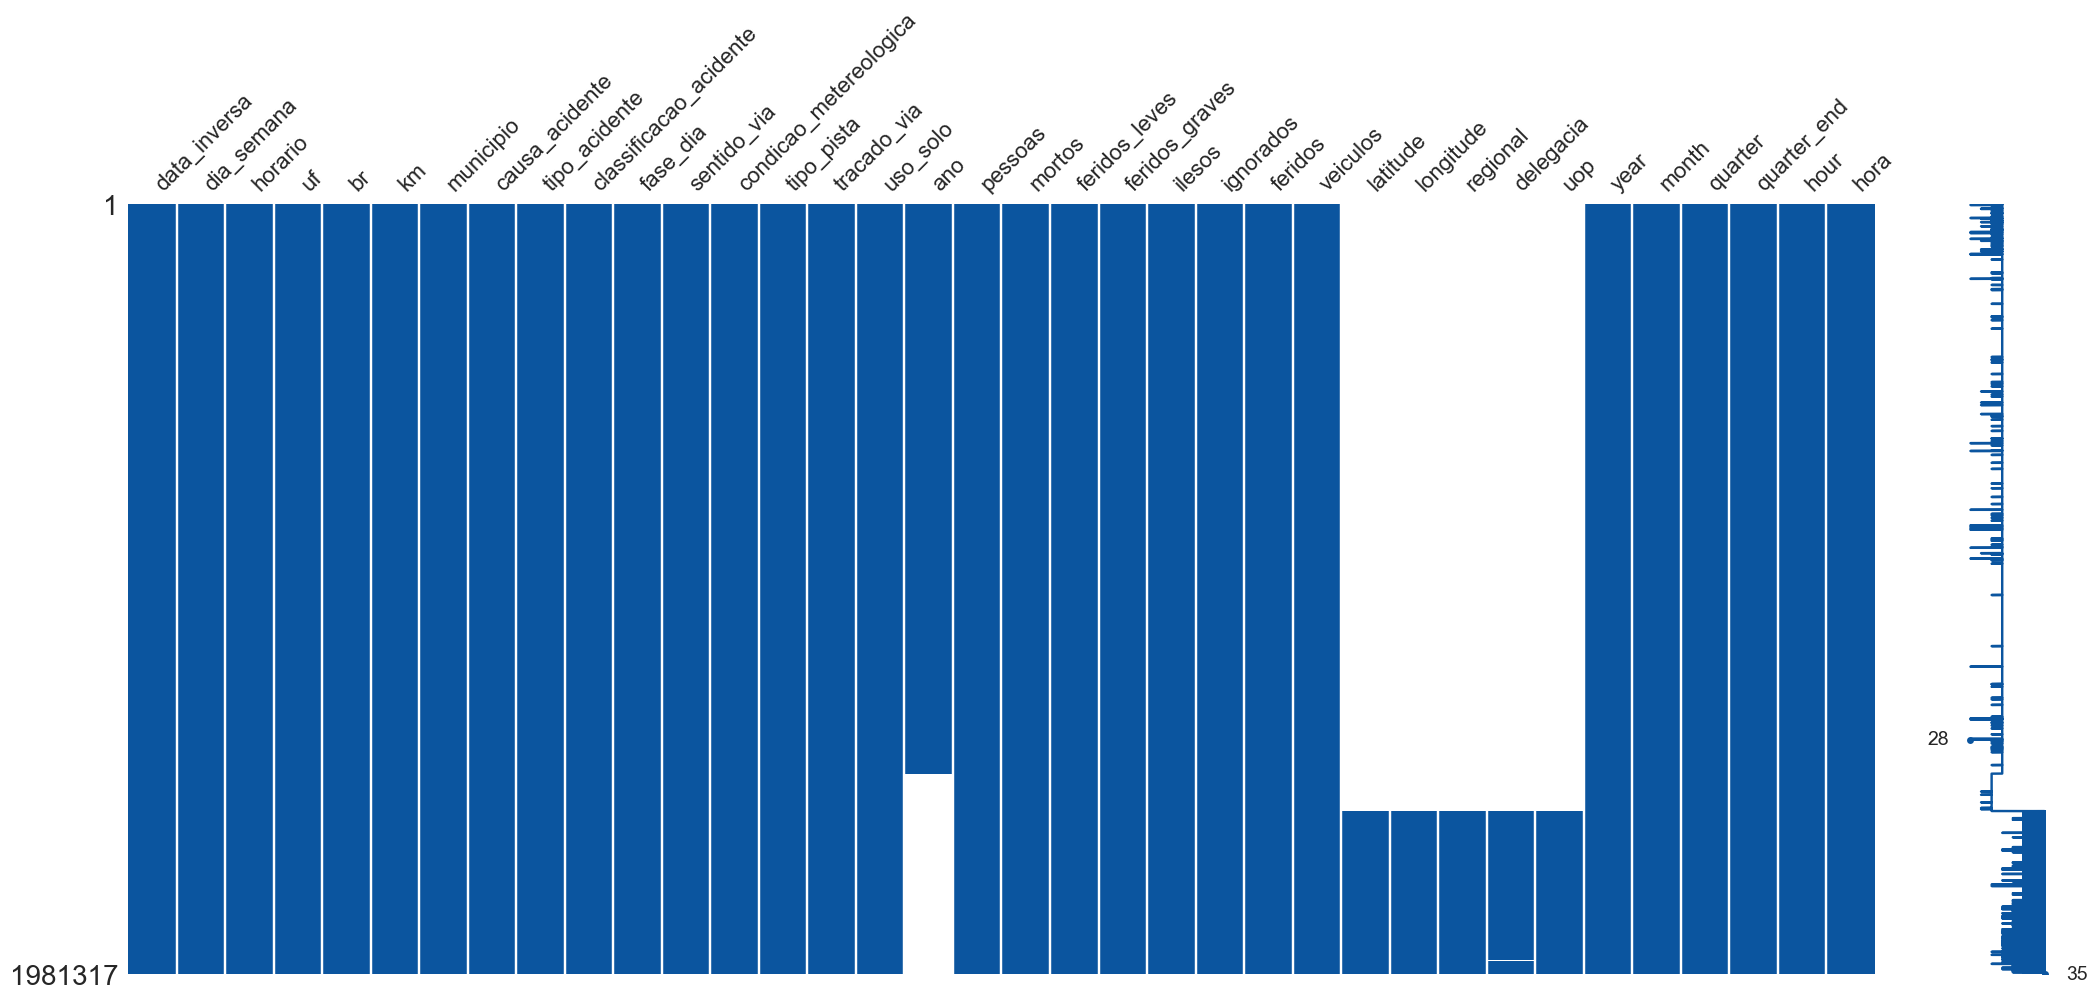

In [11]:
cor_seaborn = sns.color_palette("Blues")
cor_escolhida = cor_seaborn[5]  

plt.figure(figsize=(10, 6))
msno.matrix(df, color=cor_escolhida)

plt.show()

In [12]:
# Exclusão das colunas com maioria dos dados em branco
df = df.drop(columns = ["latitude", "longitude", "regional", "delegacia", "uop", "ano", "municipio"])

In [13]:
df.dropna(inplace = True)

In [14]:
df.stb.missing()

,missing,total,percent
data_inversa,0,1980229,0.0
pessoas,0,1980229,0.0
hour,0,1980229,0.0
quarter_end,0,1980229,0.0
quarter,0,1980229,0.0
month,0,1980229,0.0
year,0,1980229,0.0
veiculos,0,1980229,0.0
feridos,0,1980229,0.0
ignorados,0,1980229,0.0


Criação da coluna 'acidente_fatal' para ser o target.

* 0: acidente **sem** morte
* 1: acidente **com** morte

In [15]:
mapeamento = lambda x: 1 if x > 0 else 0
df['acidente_fatal'] = df['mortos'].map(mapeamento)
df.head()

,data_inversa,dia_semana,horario,uf,br,km,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,...,ignorados,feridos,veiculos,year,month,quarter,quarter_end,hour,hora,acidente_fatal
0,2007-01-01,Segunda,06:30:00,PA,316.0,9.0,Desobediência à sinalização,Colisão Transversal,Com Vítimas Feridas,Amanhecer,...,0,1,2,2007,1,1,False,06,06,0
1,2007-01-01,Segunda,08:40:00,MG,381.0,397.4,Outras,Saída de Pista,Sem Vítimas,Pleno dia,...,0,0,1,2007,1,1,False,08,08,0
2,2007-01-01,Segunda,15:20:00,SC,282.0,23.0,Desobediência à sinalização,Colisão Transversal,Com Vítimas Feridas,Pleno dia,...,0,1,2,2007,1,1,False,15,15,0
3,2007-01-01,Segunda,14:00:00,MG,40.0,120.8,Dormindo,Saída de Pista,Sem Vítimas,Pleno dia,...,0,0,1,2007,1,1,False,14,14,0
4,2007-01-01,Segunda,12:00:00,MG,50.0,0.2,Outras,Saída de Pista,Com Vítimas Feridas,Pleno dia,...,0,4,1,2007,1,1,False,12,12,0


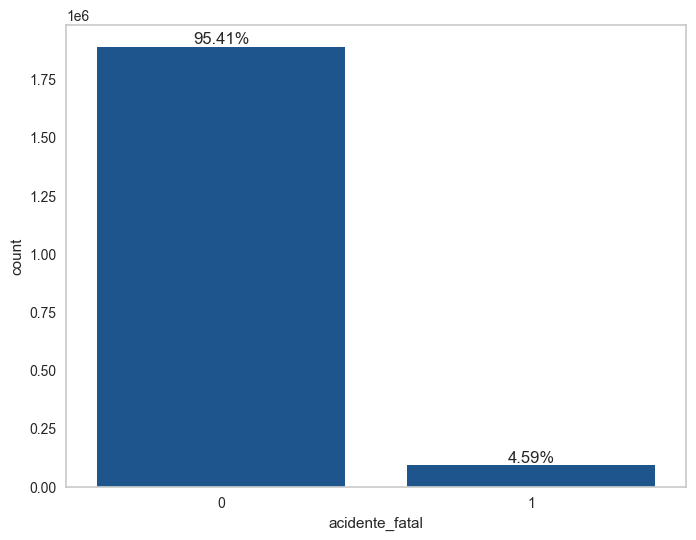

In [16]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x = df['acidente_fatal'], color=cor_escolhida) 

total = len(df['acidente_fatal'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total) * 100),
            ha = "center", va = "bottom")
plt.grid(False)
plt.show()

Os dados de acidentes fatais estão desbalanceados, para trabalhar de agora por diante será feito um novo dataset selecionando apenas acidentes que houveram feridos graves.

* 0: acidente **sem** feridos grave
* 1: acidente **com** feridos grave

In [17]:
mapeamento = lambda x: 1 if x > 0 else 0
df['acidente_grave'] = df['feridos_graves'].map(mapeamento)
df.head()

,data_inversa,dia_semana,horario,uf,br,km,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,...,feridos,veiculos,year,month,quarter,quarter_end,hour,hora,acidente_fatal,acidente_grave
0,2007-01-01,Segunda,06:30:00,PA,316.0,9.0,Desobediência à sinalização,Colisão Transversal,Com Vítimas Feridas,Amanhecer,...,1,2,2007,1,1,False,06,06,0,0
1,2007-01-01,Segunda,08:40:00,MG,381.0,397.4,Outras,Saída de Pista,Sem Vítimas,Pleno dia,...,0,1,2007,1,1,False,08,08,0,0
2,2007-01-01,Segunda,15:20:00,SC,282.0,23.0,Desobediência à sinalização,Colisão Transversal,Com Vítimas Feridas,Pleno dia,...,1,2,2007,1,1,False,15,15,0,1
3,2007-01-01,Segunda,14:00:00,MG,40.0,120.8,Dormindo,Saída de Pista,Sem Vítimas,Pleno dia,...,0,1,2007,1,1,False,14,14,0,0
4,2007-01-01,Segunda,12:00:00,MG,50.0,0.2,Outras,Saída de Pista,Com Vítimas Feridas,Pleno dia,...,4,1,2007,1,1,False,12,12,0,1


Considerando que todo acidente fatal é um acidente com ferido grave, com a função lambda foi realizada a correção de alguns dados de acidente com morte que não estavam sendo contabilizados em acidente grave.

In [18]:
update_acidente_grave = lambda x: 1 if x['acidente_fatal'] == 1 else x['acidente_grave']
df['acidente_grave'] = df.apply(update_acidente_grave, axis = 1)

# Visualização do novo dataset

In [19]:
df = df[df['acidente_grave'] != 0]
df.head()

,data_inversa,dia_semana,horario,uf,br,km,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,...,feridos,veiculos,year,month,quarter,quarter_end,hour,hora,acidente_fatal,acidente_grave
2,2007-01-01,Segunda,15:20:00,SC,282.0,23.0,Desobediência à sinalização,Colisão Transversal,Com Vítimas Feridas,Pleno dia,...,1,2,2007,1,1,False,15,15,0,1
4,2007-01-01,Segunda,12:00:00,MG,50.0,0.2,Outras,Saída de Pista,Com Vítimas Feridas,Pleno dia,...,4,1,2007,1,1,False,12,12,0,1
8,2007-01-01,Segunda,18:10:00,SE,235.0,62.0,Falta de atenção,Colisão traseira,Com Vítimas Feridas,Anoitecer,...,1,2,2007,1,1,False,18,18,0,1
13,2007-01-01,Segunda,17:40:00,DF,70.0,9.0,Outras,Capotamento,Com Vítimas Feridas,Pleno dia,...,6,1,2007,1,1,False,17,17,0,1
16,2007-01-01,Segunda,06:00:00,RJ,101.0,219.0,Outras,Colisão lateral,Com Vítimas Feridas,Amanhecer,...,5,2,2007,1,1,False,06,06,0,1


In [20]:
df.shape

(349938, 31)

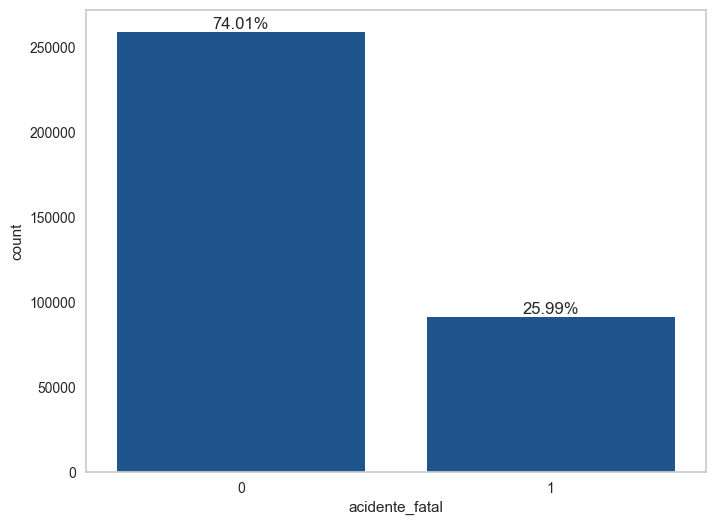

In [21]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=df['acidente_fatal'], color=cor_escolhida)

total = len(df['acidente_fatal'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total) * 100),
            ha = "center", va = "bottom")
plt.grid(False)
plt.show()

# Tratamento de dados

Seleção apenas das colunas que serão utilizadas para features e target e algumas colunas que servirão de auxiliar para tratamentos das colunas importantes.

In [22]:
df = df[['dia_semana', 'tipo_acidente', 'hour', 'fase_dia', 'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo', 'year', 'acidente_fatal']]
df = df.reset_index(drop = True)
df

,dia_semana,tipo_acidente,hour,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,year,acidente_fatal
0,Segunda,Colisão Transversal,15,Pleno dia,Nublado,Simples,Cruzamento,Rural,2007,0
1,Segunda,Saída de Pista,12,Pleno dia,Nublado,Simples,Curva,Rural,2007,0
2,Segunda,Colisão traseira,18,Anoitecer,Ceu Claro,Simples,Reta,Rural,2007,0
3,Segunda,Capotamento,17,Pleno dia,Ceu Claro,Dupla,Reta,Urbano,2007,0
4,Segunda,Colisão lateral,06,Amanhecer,Chuva,Simples,Curva,Rural,2007,0
...,...,...,...,...,...,...,...,...,...,...
349933,sábado,Colisão frontal,13,Pleno dia,Céu Claro,Simples,Não Informado,Não,2022,0
349934,sábado,Saída de leito carroçável,18,Pleno dia,Céu Claro,Dupla,Reta,Não,2022,0
349935,sábado,Saída de leito carroçável,14,Pleno dia,Chuva,Múltipla,Não Informado,Não,2022,0
349936,sábado,Tombamento,16,Pleno dia,Céu Claro,Dupla,Reta,Não,2022,0


Será necessário fazer novamente tratamento de dados, dessa vez das colunas que servirão como variáveis independentes.

## Coluna: dia_semana

In [23]:
df.rename(columns = {'dia_semana': 'final_de_semana'}, inplace = True)

In [24]:
df['final_de_semana'].unique()

array(['Segunda', 'Quinta', 'Domingo', 'Terça', 'Sexta', 'Quarta',
       'Sábado', 'domingo', 'segunda-feira', 'terça-feira',
       'quarta-feira', 'quinta-feira', 'sexta-feira', 'sábado'],
      dtype=object)

In [25]:
mapeamento_semana = {
    'domingo': 'sim',
    'segunda-feira': 'não',
    'terça-feira': 'não',
    'quarta-feira': 'não',
    'quinta-feira': 'não',
    'sexta-feira': 'não',
    'sábado': 'sim',
    'Domingo': 'sim',
    'Segunda': 'não',
    'Terça': 'não',
    'Quarta': 'não',
    'Quinta': 'não',
    'Sexta': 'não',
    'Sábado': 'sim'
}

df['final_de_semana'] = df['final_de_semana'].map(mapeamento_semana)

In [26]:
np.round(df['final_de_semana'].value_counts(normalize = True) * 100, 2)

final_de_semana
não    62.45
sim    37.55
Name: proportion, dtype: float64

## coluna: tipo_acidente

In [27]:
df['tipo_acidente'].nunique()

30

In [28]:
df['tipo_acidente'].unique()

array(['Colisão Transversal', 'Saída de Pista', 'Colisão traseira',
       'Capotamento', 'Colisão lateral', 'Atropelamento de pessoa',
       'Colisão frontal', 'Colisão com objeto fixo',
       'Colisão com objeto móvel',
       'Queda de motocicleta / bicicleta / veículo',
       'Colisão com bicicleta', 'Atropelamento de animal', 'Tombamento',
       'Derramamento de Carga', 'Danos Eventuais', 'Incêndio',
       'Saída de leito carroçável', 'Colisão transversal',
       'Queda de ocupante de veículo', 'Atropelamento de Pedestre',
       'Colisão com objeto estático', 'Atropelamento de Animal',
       'Colisão com objeto em movimento', 'Engavetamento',
       'Danos eventuais', 'Derramamento de carga', 'Eventos atípicos',
       'Colisão com objeto', 'Colisão lateral mesmo sentido',
       'Colisão lateral sentido oposto'], dtype=object)

In [29]:
df['tipo_acidente'] = df['tipo_acidente'].apply(lambda x:convert_lower_case(x))

In [30]:
mapeamento_acidente = {
    'colisão transversal': 'colisão',
    'saída de pista': 'saída de pista',
    'colisão lateral': 'colisão',
    'colisão com bicicleta': 'colisão',
    'colisão traseira': 'colisão',
    'colisão com objeto fixo': 'colisão',
    'capotamento': 'capotamento',
    'queda de motocicleta / bicicleta / veículo': 'queda',
    'incêndio': 'incêndio',
    'atropelamento de pessoa': 'atropelamento de pessoa',
    'colisão frontal': 'colisão',
    'atropelamento de animal': 'atropelamento de animal',
    'colisão com objeto móvel': 'colisão',
    'tombamento': 'tombamento',
    'derramamento de carga': 'derramamento de carga',
    'danos eventuais': 'outros',
    'colisão com objeto estático': 'colisão',
    'saída de leito carroçável': 'saída de pista',
    'queda de ocupante de veículo': 'queda',
    'atropelamento de pedestre': 'atropelamento de pessoa',
    'engavetamento': 'colisão',
    'colisão com objeto em movimento': 'colisão',
    'colisão com objeto': 'colisão',
    'colisão lateral mesmo sentido': 'colisão',
    'eventos atípicos': 'outros',
    'colisão lateral sentido oposto': 'colisão'
}

df['tipo_acidente'] = df['tipo_acidente'].map(mapeamento_acidente)

In [31]:
np.round(df['tipo_acidente'].value_counts(normalize = True) * 100, 2)

tipo_acidente
colisão                    59.54
atropelamento de pessoa    12.30
saída de pista             11.84
queda                       5.76
capotamento                 4.66
tombamento                  3.97
atropelamento de animal     1.66
outros                      0.15
derramamento de carga       0.07
incêndio                    0.04
Name: proportion, dtype: float64

In [32]:
df = df.drop(df[df['tipo_acidente'] == 'outros'].index).reset_index(drop = True)

## coluna: fase_dia

In [33]:
df['fase_dia'].unique()

array(['Pleno dia', 'Anoitecer', 'Amanhecer', 'Plena noite',
       'Plena Noite'], dtype=object)

In [34]:
sorted(df[df['fase_dia'] == 'Pleno dia']['hour'].unique())

['00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23']

In [35]:
df['hour'] = df['hour'].astype(int)

In [36]:
mapeamento_horario = lambda x: (
    'madrugada' if 0 <= x < 6
    else 'manhã' if 6 <= x < 12
    else 'tarde' if 12 <= x < 18
    else 'noite'
)

df['fase_dia'] = df['hour'].apply(mapeamento_horario)

In [37]:
sorted(df[df['fase_dia'] == 'manhã']['hour'].unique())

[6, 7, 8, 9, 10, 11]

In [38]:
df = df.drop(columns = ['hour'])

## coluna: condicao_metereologica

In [39]:
df['condicao_metereologica'] = df['condicao_metereologica'].apply(lambda x:convert_lower_case(x))

In [40]:
np.round(df['condicao_metereologica'].value_counts(normalize = True) * 100, 2)

condicao_metereologica
ceu claro           37.37
céu claro           18.85
nublado             17.69
chuva               11.48
sol                  9.90
ignorada             1.86
nevoeiro/neblina     1.05
garoa/chuvisco       0.86
ignorado             0.60
vento                0.34
granizo              0.01
neve                 0.01
Name: proportion, dtype: float64

In [41]:
mapeamento_metereologica = {
    'ceu claro': 'condições favoráveis',
    'céu claro': 'condições favoráveis',
    'nublado': 'condições adversas',
    'sol': 'condições favoráveis',
    'chuva': 'condições adversas',
    'garoa/chuvisco': 'condições adversas',
    'vento': 'condições adversas',
    'nevoeiro/neblina': 'condições adversas',
    'granizo': 'condições adversas',
    'neve': 'condições adversas',
    'ignorada': 'ignorado',
    'ignorado': 'ignorado'
}

df['condicao_metereologica'] = df['condicao_metereologica'].map(mapeamento_metereologica)

In [42]:
df = df.drop(df[df['condicao_metereologica'] == 'ignorado'].index).reset_index(drop = True)

In [43]:
np.round(df['condicao_metereologica'].value_counts(normalize = True) * 100, 2)

condicao_metereologica
condições favoráveis    67.78
condições adversas      32.22
Name: proportion, dtype: float64

## coluna: tipo_pista

In [44]:
df['tipo_pista'].unique()

array(['Simples', 'Dupla', 'Múltipla'], dtype=object)

In [45]:
df['tipo_pista'] = df['tipo_pista'].apply(lambda x:convert_lower_case(x))

## coluna: tracado_via

In [46]:
df['tracado_via'] = df['tracado_via'].apply(lambda x:convert_lower_case(x))

In [47]:
df['tracado_via'].unique()

array(['cruzamento', 'curva', 'reta', 'desvio temporário',
       'não informado', 'retorno regulamentado', 'interseção de vias',
       'rotatória', 'viaduto', 'ponte', 'túnel'], dtype=object)

In [48]:
np.round(df['tracado_via'].value_counts(normalize = True) * 100, 2)

tracado_via
reta                     69.53
curva                    19.78
não informado             3.76
cruzamento                3.60
interseção de vias        1.28
desvio temporário         0.91
rotatória                 0.41
retorno regulamentado     0.31
ponte                     0.20
viaduto                   0.18
túnel                     0.03
Name: proportion, dtype: float64

In [49]:
df = df.drop(df[df['tracado_via'] == 'não informado'].index).reset_index(drop = True)

In [50]:
mapeamento_tracado_via = {
    'reta': 'reta',
    'curva': 'curva',
    'cruzamento': 'cruzamento',
    'interseção de vias ': 'cruzamento',
    'desvio temporário': 'desvio temporário',
    'rotatória': 'rotatória',
    'retorno regulamentado': 'retorno regulamentado',
    'ponte': 'ponte/viaduto/túnel',
    'viaduto': 'ponte/viaduto/túnel',
    'túnel': 'ponte/viaduto/túnel'
}

df['tracado_via'] = df['tracado_via'].map(mapeamento_tracado_via)

In [51]:
np.round(df['tracado_via'].value_counts(normalize = True) * 100, 2)

tracado_via
reta                     73.23
curva                    20.84
cruzamento                3.79
desvio temporário         0.96
ponte/viaduto/túnel       0.43
rotatória                 0.43
retorno regulamentado     0.33
Name: proportion, dtype: float64

## coluna: uso_solo

In [52]:
df['uso_solo'] = df['uso_solo'].apply(lambda x:convert_lower_case(x))

In [53]:
np.round(df['uso_solo'].value_counts(normalize = True) * 100, 2)

uso_solo
rural     38.00
urbano    33.61
não       16.36
sim       12.03
Name: proportion, dtype: float64

In [54]:
mapeamento_solo = {
    'rural': 'rural',
    'não': 'rural',
    'urbano': 'urbano',
    'sim': 'urbano'
}

df['uso_solo'] = df['uso_solo'].map(mapeamento_solo)

In [55]:
np.round(df['uso_solo'].value_counts(normalize = True) * 100, 2)

uso_solo
rural     54.36
urbano    45.64
Name: proportion, dtype: float64

In [56]:
df

,final_de_semana,tipo_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,year,acidente_fatal
0,não,colisão,tarde,condições adversas,simples,cruzamento,rural,2007,0
1,não,saída de pista,tarde,condições adversas,simples,curva,rural,2007,0
2,não,colisão,noite,condições favoráveis,simples,reta,rural,2007,0
3,não,capotamento,tarde,condições favoráveis,dupla,reta,urbano,2007,0
4,não,colisão,manhã,condições adversas,simples,curva,rural,2007,0
...,...,...,...,...,...,...,...,...,...
327988,sim,atropelamento de pessoa,tarde,condições favoráveis,dupla,reta,rural,2022,1
327989,sim,queda,tarde,condições favoráveis,simples,reta,rural,2022,0
327990,sim,saída de pista,noite,condições favoráveis,dupla,reta,rural,2022,0
327991,sim,tombamento,tarde,condições favoráveis,dupla,reta,rural,2022,0


# Divisão features e target

In [57]:
x = df.iloc[:, :7].values

In [58]:
y = df.iloc[:, -1].values

In [59]:
x.shape, y.shape

((327993, 7), (327993,))

# Tratamento de atributos categóricos

## LabelEncoder

In [60]:
x[0]

array(['não', 'colisão', 'tarde', 'condições adversas', 'simples',
       'cruzamento', 'rural'], dtype=object)

In [61]:
label_encoder_final_de_semana = LabelEncoder()
label_encoder_tipo_acidente = LabelEncoder()
label_encoder_fase_dia = LabelEncoder()
label_encoder_condicao_metereologica = LabelEncoder()
label_encoder_tipo_pista = LabelEncoder()
label_encoder_tracado_via = LabelEncoder()
label_encoder_uso_solo = LabelEncoder()

In [62]:
x[:, 0] = label_encoder_final_de_semana.fit_transform(x[:, 0])
x[:, 1] = label_encoder_tipo_acidente.fit_transform(x[:, 1])
x[:, 2] = label_encoder_fase_dia.fit_transform(x[:, 2])
x[:, 3] = label_encoder_condicao_metereologica.fit_transform(x[:, 3])
x[:, 4] = label_encoder_tipo_pista.fit_transform(x[:, 4])
x[:, 5] = label_encoder_tracado_via.fit_transform(x[:, 5])
x[:, 6] = label_encoder_uso_solo.fit_transform(x[:, 6])

In [63]:
x[0]

array([0, 3, 3, 0, 2, 0, 0], dtype=object)

In [64]:
x

array([[0, 3, 3, ..., 2, 0, 0],
       [0, 7, 3, ..., 2, 1, 0],
       [0, 3, 2, ..., 2, 4, 0],
       ...,
       [1, 7, 2, ..., 0, 4, 0],
       [1, 8, 3, ..., 0, 4, 0],
       [1, 0, 2, ..., 2, 4, 0]], dtype=object)

## OneHotEncoder

In [65]:
onehotencoder_x = ColumnTransformer(transformers = [('OneHot', OneHotEncoder(), [0, 1, 2, 3, 4, 5, 6])], remainder = 'passthrough')

In [66]:
x = onehotencoder_x.fit_transform(x).toarray()
x

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.]])

In [102]:
x[0]

array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [67]:
x.shape

(327993, 30)

# Divisão das bases em treinamento e teste

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)

In [70]:
x_train.shape, y_train.shape

((262394, 30), (262394,))

In [71]:
x_test.shape, y_test.shape

((65599, 30), (65599,))

# Modelos

## Árvores de decisão

In [72]:
arvore_modelo = DecisionTreeClassifier(criterion = 'log_loss', min_samples_leaf = 1, min_samples_split = 2 , splitter = 'best')
arvore_modelo.fit(x_train, y_train)
previsoes = arvore_modelo.predict(x_test)

In [73]:
accuracy_score(y_test, previsoes)

0.748304090001372

0.748304090001372

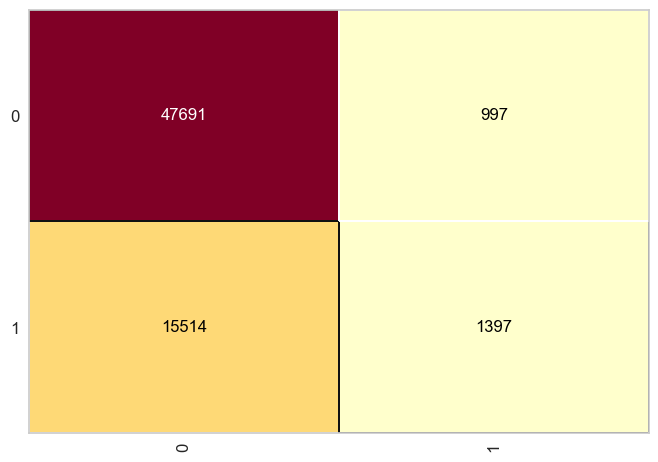

In [74]:
cm = ConfusionMatrix(arvore_modelo)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [75]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.75      0.98      0.85     48688
           1       0.58      0.08      0.14     16911

    accuracy                           0.75     65599
   macro avg       0.67      0.53      0.50     65599
weighted avg       0.71      0.75      0.67     65599



## Random Forest

In [76]:
random_modelo = RandomForestClassifier(n_estimators = 40, criterion = 'entropy', class_weight = "balanced",
                                       min_samples_leaf = 5, min_samples_split = 5)
random_modelo.fit(x_train, y_train)
previsoes = random_modelo.predict(x_test)

In [77]:
accuracy_score(y_test, previsoes)

0.6297961859174682

0.6297961859174682

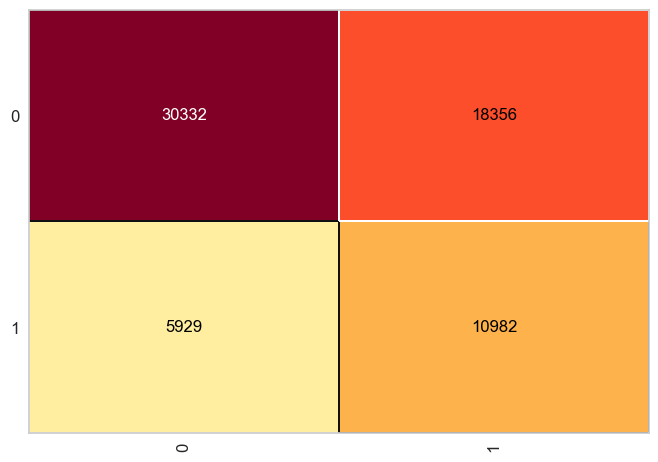

In [78]:
cm = ConfusionMatrix(random_modelo)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [79]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.84      0.62      0.71     48688
           1       0.37      0.65      0.47     16911

    accuracy                           0.63     65599
   macro avg       0.61      0.64      0.59     65599
weighted avg       0.72      0.63      0.65     65599



## K-Nearest Neighbour (KNN)

In [80]:
knn_modelo = KNeighborsClassifier(n_neighbors = 20, p = 1)
knn_modelo.fit(x_train, y_train)
previsoes = knn_modelo.predict(x_test)

In [81]:
accuracy_score(y_test, previsoes)

0.7397063979633836

0.7397063979633836

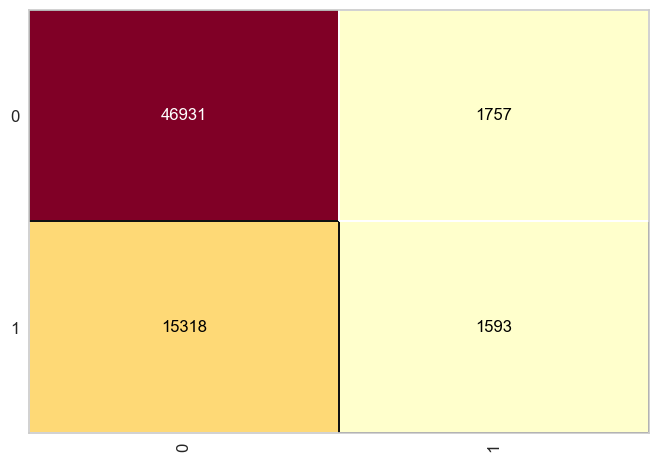

In [82]:
cm = ConfusionMatrix(knn_modelo)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [83]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.75      0.96      0.85     48688
           1       0.48      0.09      0.16     16911

    accuracy                           0.74     65599
   macro avg       0.61      0.53      0.50     65599
weighted avg       0.68      0.74      0.67     65599



## Regressão logística

In [84]:
logistic_modelo = LogisticRegression(C = 1.0, solver = 'lbfgs', tol = 0.00001, class_weight = 'balanced')
logistic_modelo.fit(x_train, y_train)
previsoes = logistic_modelo.predict(x_test)

In [85]:
accuracy_score(y_test, previsoes)

0.6218844799463407

0.6218844799463407

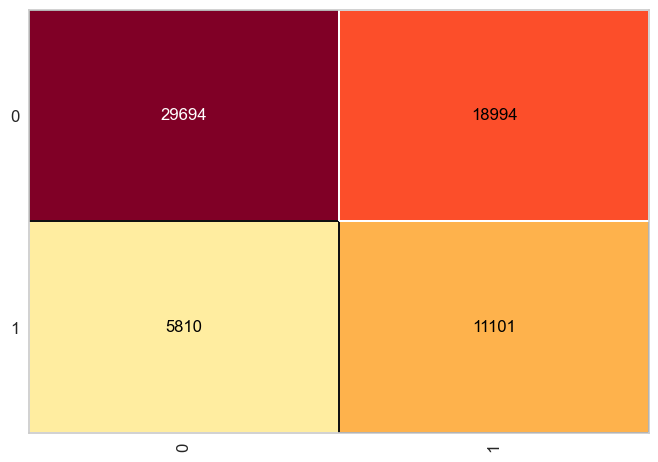

In [86]:
cm = ConfusionMatrix(logistic_modelo)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [87]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.84      0.61      0.71     48688
           1       0.37      0.66      0.47     16911

    accuracy                           0.62     65599
   macro avg       0.60      0.63      0.59     65599
weighted avg       0.72      0.62      0.65     65599



## Redes neurais artificiais

In [88]:
# neuronios
(7 + 1) / 2

4.0

In [89]:
rede_neural_modelo = MLPClassifier(max_iter = 1000, verbose = True, tol = 0.0000100,
                                   solver = 'sgd', activation = 'logistic',
                                   hidden_layer_sizes = (4, 4),
                                   batch_size = 10)
rede_neural_modelo.fit(x_train, y_train)

Iteration 1, loss = 0.57132945


Iteration 2, loss = 0.57000599
Iteration 3, loss = 0.56305494
Iteration 4, loss = 0.54647400
Iteration 5, loss = 0.53813651
Iteration 6, loss = 0.53636501
Iteration 7, loss = 0.53596278
Iteration 8, loss = 0.53579348
Iteration 9, loss = 0.53565568
Iteration 10, loss = 0.53554237
Iteration 11, loss = 0.53543369
Iteration 12, loss = 0.53531020
Iteration 13, loss = 0.53515836
Iteration 14, loss = 0.53498078
Iteration 15, loss = 0.53484851
Iteration 16, loss = 0.53468389
Iteration 17, loss = 0.53457507
Iteration 18, loss = 0.53436261
Iteration 19, loss = 0.53417178
Iteration 20, loss = 0.53401278
Iteration 21, loss = 0.53386449
Iteration 22, loss = 0.53368981
Iteration 23, loss = 0.53352777
Iteration 24, loss = 0.53333140
Iteration 25, loss = 0.53318794
Iteration 26, loss = 0.53306997
Iteration 27, loss = 0.53289496
Iteration 28, loss = 0.53276515
Iteration 29, loss = 0.53268403
Iteration 30, loss = 0.53260661
Iteration 31, loss = 0.53250538
Iteration 32, loss = 0.53245485
Iteration 33, lo

MLPClassifier(activation='logistic', batch_size=10, hidden_layer_sizes=(4, 4),
              max_iter=1000, solver='sgd', tol=1e-05, verbose=True)

In [90]:
previsoes = rede_neural_modelo.predict(x_test)

In [91]:
accuracy_score(y_test, previsoes)

0.7498285034832848

0.7498285034832848

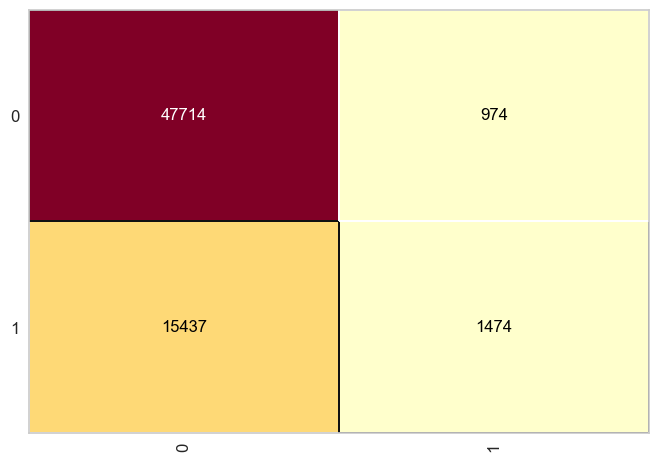

In [92]:
cm = ConfusionMatrix(rede_neural_modelo)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [93]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.76      0.98      0.85     48688
           1       0.60      0.09      0.15     16911

    accuracy                           0.75     65599
   macro avg       0.68      0.53      0.50     65599
weighted avg       0.72      0.75      0.67     65599



# Validação cruzada

## Árvore de decisão

In [94]:
parametros = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [95]:
grid_search = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = parametros, scoring = 'recall')
grid_search.fit(x, y)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
0.08611065388734097


## Random forest

In [96]:
parametros = {'criterion': ['gini', 'entropy'],
              'n_estimators': [10, 40, 100],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [97]:
grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid = parametros)
grid_search.fit(x, y)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'gini', 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 100}
0.7485403705587832


## Knn

In [98]:
parametros = {'n_neighbors': [3, 5, 10, 20],
              'p': [1, 2]}

In [99]:
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = parametros)
grid_search.fit(x, y)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'n_neighbors': 20, 'p': 1}
0.7457964099777594


## Regressão logística

In [100]:
parametros = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver': ['lbfgs', 'sag', 'saga', 'adam']}

In [101]:
grid_search = GridSearchCV(estimator = LogisticRegression(), param_grid = parametros)
grid_search.fit(x, y)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.7462750818066696


# Atualizando parâmetros

## Árvores de decisão

In [103]:
arvore_modelo = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 1, min_samples_split = 10 , splitter = 'random')
arvore_modelo.fit(x_train, y_train)
previsoes = arvore_modelo.predict(x_test)

In [104]:
accuracy_score(y_test, previsoes)

0.7485022637540206

0.7485022637540206

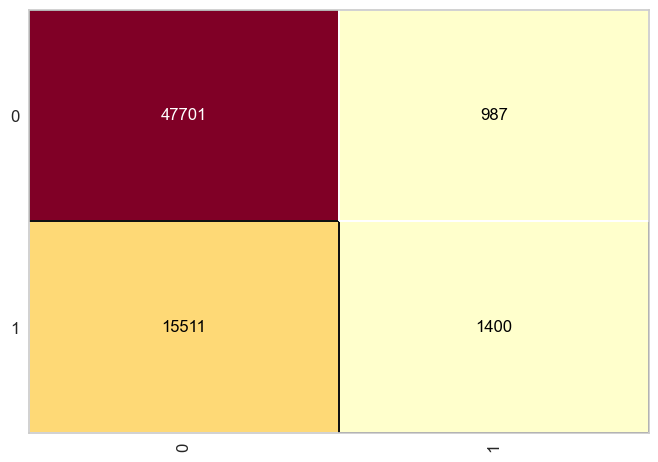

In [105]:
cm = ConfusionMatrix(arvore_modelo)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [106]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.75      0.98      0.85     48688
           1       0.59      0.08      0.15     16911

    accuracy                           0.75     65599
   macro avg       0.67      0.53      0.50     65599
weighted avg       0.71      0.75      0.67     65599



## Random Forest

In [107]:
random_modelo = RandomForestClassifier(n_estimators = 100, criterion = 'gini', class_weight = "balanced",
                                       min_samples_leaf = 10, min_samples_split = 10)
random_modelo.fit(x_train, y_train)
previsoes = random_modelo.predict(x_test)

In [108]:
accuracy_score(y_test, previsoes)

0.6315035290172106

0.6315035290172106

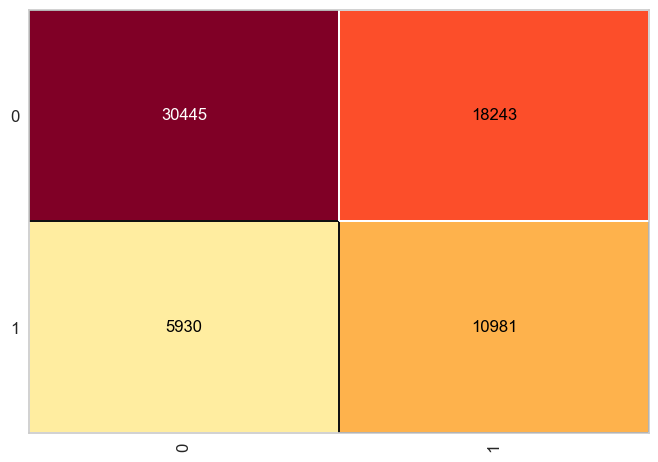

In [109]:
cm = ConfusionMatrix(random_modelo)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [110]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.84      0.63      0.72     48688
           1       0.38      0.65      0.48     16911

    accuracy                           0.63     65599
   macro avg       0.61      0.64      0.60     65599
weighted avg       0.72      0.63      0.65     65599



## K-Nearest Neighbour (KNN)

In [111]:
knn_modelo = KNeighborsClassifier(n_neighbors = 20, p = 1)
knn_modelo.fit(x_train, y_train)
previsoes = knn_modelo.predict(x_test)

In [112]:
accuracy_score(y_test, previsoes)

0.7397063979633836

0.7397063979633836

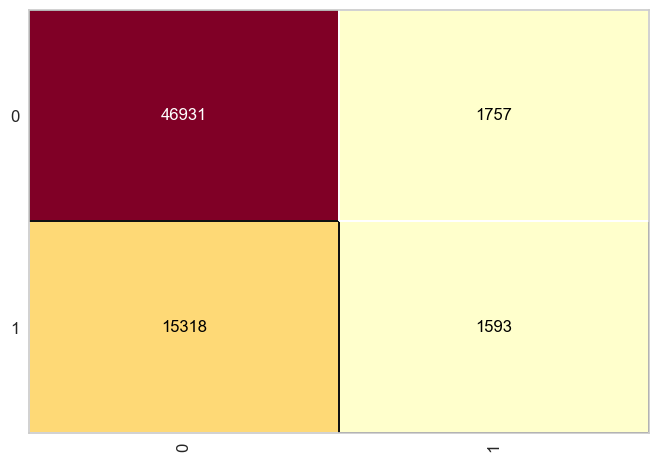

In [113]:
cm = ConfusionMatrix(knn_modelo)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [114]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.75      0.96      0.85     48688
           1       0.48      0.09      0.16     16911

    accuracy                           0.74     65599
   macro avg       0.61      0.53      0.50     65599
weighted avg       0.68      0.74      0.67     65599



## Regressão logística

In [115]:
logistic_modelo = LogisticRegression(C = 1.0, solver = 'lbfgs', tol = 0.0001, class_weight = 'balanced')
logistic_modelo.fit(x_train, y_train)
previsoes = logistic_modelo.predict(x_test)

In [116]:
accuracy_score(y_test, previsoes)

0.6222350950471806

0.6222350950471806

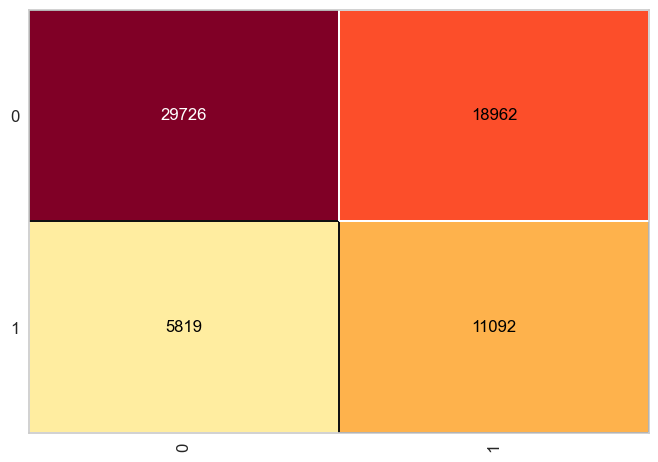

In [117]:
cm = ConfusionMatrix(logistic_modelo)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [118]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.84      0.61      0.71     48688
           1       0.37      0.66      0.47     16911

    accuracy                           0.62     65599
   macro avg       0.60      0.63      0.59     65599
weighted avg       0.72      0.62      0.65     65599



## Resultados

In [136]:
resultados_random_forest = []
resultados_logistica = []
precisoes_random_forest = []
revocacoes_random_forest = []
precisoes_logistica = []
revocacoes_logistica = []

for i in range(10):
    kfold = KFold(n_splits=5, shuffle=True, random_state=i)

    random_forest = RandomForestClassifier(n_estimators=100, criterion='gini', class_weight="balanced",
                                            min_samples_leaf=10, min_samples_split=10)
    scores = cross_val_score(random_forest, x, y, cv=kfold)
    resultados_random_forest.append(scores.mean())
    y_pred_rf = cross_val_predict(random_forest, x, y, cv=kfold)
    precisao_rf = precision_score(y, y_pred_rf, pos_label=1)
    revocacao_rf = recall_score(y, y_pred_rf, pos_label=1)
    precisoes_random_forest.append(precisao_rf.mean())
    revocacoes_random_forest.append(revocacao_rf.mean())

    logistica = LogisticRegression(C=1.0, solver='lbfgs', tol=0.0001, class_weight='balanced')
    scores = cross_val_score(logistica, x, y, cv=kfold)
    resultados_logistica.append(scores.mean())
    y_pred_logistica = cross_val_predict(logistica, x, y, cv=kfold)
    precisao_logistica = precision_score(y, y_pred_logistica, pos_label=1)
    revocacao_logistica = recall_score(y, y_pred_logistica, pos_label=1)
    precisoes_logistica.append(precisao_logistica.mean())
    revocacoes_logistica.append(revocacao_logistica.mean())


In [139]:
resultados = pd.DataFrame({'Accuracy Random forest': resultados_random_forest, 'Accuracy Logistica': resultados_logistica, 
                            'Precision Random Forest': precisoes_random_forest, 'Precision Logistica': precisoes_logistica,
                            'Recall Random Forest': revocacoes_random_forest, 'Recall Logistica': revocacoes_logistica})
resultados

,Accuracy Random forest,Accuracy Logistica,Precision Random Forest,Precision Logistica,Recall Random Forest,Recall Logistica
0,0.629202,0.619724,0.372887,0.366434,0.640206,0.651749
1,0.628940,0.619699,0.372680,0.366462,0.639780,0.652069
2,0.627852,0.619910,0.372010,0.366604,0.644606,0.651891
3,0.628263,0.620114,0.373114,0.366748,0.638610,0.651761
4,0.629468,0.619705,0.372749,0.366469,0.641424,0.652080
5,0.628154,0.619687,0.371458,0.366435,0.644712,0.651950
6,0.628471,0.619452,0.371351,0.366272,0.642181,0.652116
7,0.627611,0.619312,0.371991,0.366180,0.644476,0.652246
8,0.629062,0.619922,0.372851,0.366569,0.640395,0.651595
9,0.628215,0.620327,0.372946,0.366841,0.640017,0.651241


In [140]:
resultados.describe()

,Accuracy Random forest,Accuracy Logistica,Precision Random Forest,Precision Logistica,Recall Random Forest,Recall Logistica
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.628524,0.619785,0.372404,0.366501,0.641641,0.651870
std,0.000615,0.000298,0.000646,0.000200,0.002248,0.000296
min,0.627611,0.619312,0.371351,0.366180,0.638610,0.651241
25%,0.628169,0.619690,0.371996,0.366434,0.640064,0.651752
50%,0.628367,0.619714,0.372715,0.366466,0.640910,0.651921
75%,0.629032,0.619919,0.372878,0.366595,0.643902,0.652077
max,0.629468,0.620327,0.373114,0.366841,0.644712,0.652246
